In [ ]:
!pip install --upgrade keras

     |████████████████████████████████| 378kB 8.9MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [ ]:
dataset = pd.read_csv('Training(1).csv')
dataset.fillna(0)
dataset['prognosis']=dataset['prognosis'].astype('category')
dataset.insert(len(dataset.columns),"prognosis_index",dataset['prognosis'].cat.codes,True)
X = dataset.iloc[:, 0:132].values
y = dataset.iloc[:,-1].values

dataset2 = pd.read_csv('Testing(1).csv')
dataset2.fillna(0)
dataset2['prognosis']=dataset2['prognosis'].astype('category')
dataset2.insert(len(dataset2.columns),"prognosis_index",dataset2['prognosis'].cat.codes,True)
X_test = dataset2.iloc[:, 0:132].values
y_test = dataset2.iloc[:,-1].values

In [ ]:
np.unique(y)
dataset.dtypes

itching                    int64
skin_rash                  int64
nodal_skin_eruptions       int64
continuous_sneezing        int64
shivering                  int64
                          ...   
blister                    int64
red_sore_around_nose       int64
yellow_crust_ooze          int64
prognosis               category
prognosis_index             int8
Length: 134, dtype: object

In [ ]:
model=Sequential()
model.add(Dense(133,input_dim=132, activation='relu'))
model.add(Dense(87,activation='relu'))
model.add(Dense(41,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X,y,epochs=10, batch_size=2000)


Epoch 1/10
4920/4920 [==============================] - 1s 114us/step - loss: 3.7241 - accuracy: 0.0039
Epoch 2/10
4920/4920 [==============================] - 0s 12us/step - loss: 3.6203 - accuracy: 0.0467
Epoch 3/10
4920/4920 [==============================] - 0s 11us/step - loss: 3.5127 - accuracy: 0.2730
Epoch 4/10
4920/4920 [==============================] - 0s 11us/step - loss: 3.4029 - accuracy: 0.5112
Epoch 5/10
4920/4920 [==============================] - 0s 12us/step - loss: 3.2858 - accuracy: 0.6516
Epoch 6/10
4920/4920 [==============================] - 0s 12us/step - loss: 3.1578 - accuracy: 0.7573
Epoch 7/10
4920/4920 [==============================] - 0s 11us/step - loss: 3.0157 - accuracy: 0.8309
Epoch 8/10
4920/4920 [==============================] - 0s 12us/step - loss: 2.8594 - accuracy: 0.8583
Epoch 9/10
4920/4920 [==============================] - 0s 14us/step - loss: 2.6879 - accuracy: 0.8880
Epoch 10/10
4920/4920 [==============================] - 0s 11us/step -

In [ ]:
_,train_acc = model.evaluate(X, y)
_,test_acc = model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 180us/step


In [ ]:
def plotAccuracy(history,i,obj):
  inp=[x+1 for x in history.epoch] 
  obj.plot(inp,history.history['accuracy'],marker='o',linestyle='solid')
  obj.set_xlabel("Number of Epochs")
  obj.set_ylabel("Accuracy")
  obj.set_title("Variation of Accuracy wrt Number of Epochs\nNumber of Hidden Layers is %d" % i)

In [ ]:
plotAccuracy(history,3)

TypeError: ignored

Epoch 1/10
4920/4920 [==============================] - 0s 25us/step - loss: 3.7360 - accuracy: 0.0012
Epoch 2/10
4920/4920 [==============================] - 0s 9us/step - loss: 3.6322 - accuracy: 0.0341
Epoch 3/10
4920/4920 [==============================] - 0s 9us/step - loss: 3.5214 - accuracy: 0.1360
Epoch 4/10
4920/4920 [==============================] - 0s 9us/step - loss: 3.4088 - accuracy: 0.3047
Epoch 5/10
4920/4920 [==============================] - 0s 9us/step - loss: 3.2938 - accuracy: 0.5530
Epoch 6/10
4920/4920 [==============================] - 0s 9us/step - loss: 3.1770 - accuracy: 0.7187
Epoch 7/10
4920/4920 [==============================] - 0s 9us/step - loss: 3.0573 - accuracy: 0.8248
Epoch 8/10
4920/4920 [==============================] - 0s 9us/step - loss: 2.9338 - accuracy: 0.8772
Epoch 9/10
4920/4920 [==============================] - 0s 9us/step - loss: 2.8053 - accuracy: 0.9130
Epoch 10/10
4920/4920 [==============================] - 0s 10us/step - loss: 2.6

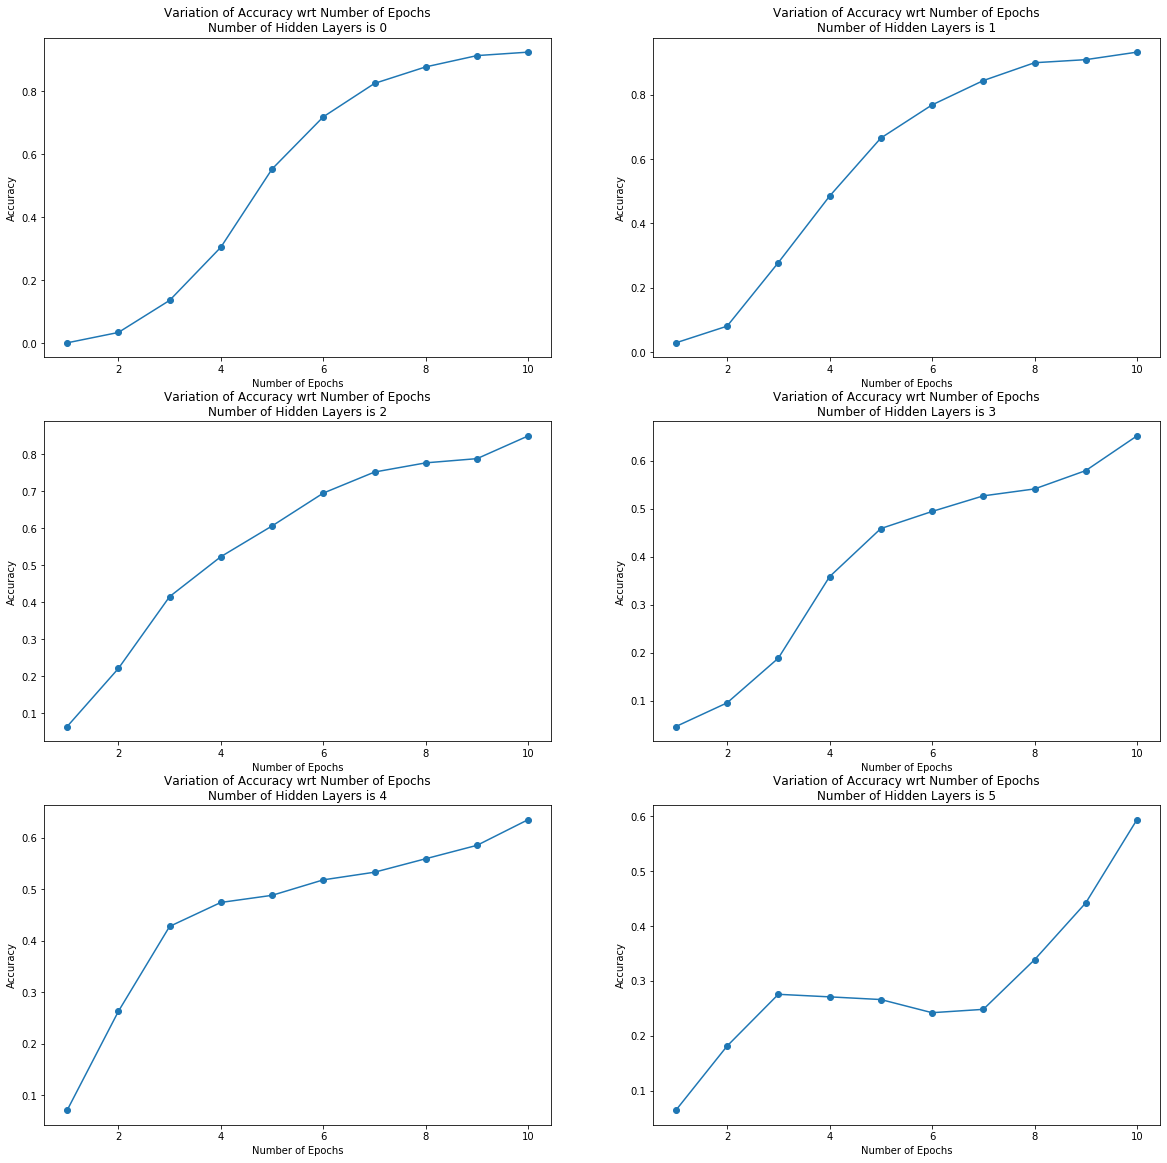

In [ ]:
a=plt.figure(figsize=(20,20))
for i in range(6):
  model=Sequential()
  model.add(Dense(133,input_dim=132, activation='relu'))
  for j in range(i):
    model.add(Dense(87,activation='relu'))
  model.add(Dense(41,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X,y,epochs=10, batch_size=2000)
  plotAccuracy(history,len(model.layers)-2,a.add_subplot((321+i)))
  plt.savefig("img01.png")